# **Waste Material Segregation for Improving Waste Management**

<img src="Waste_Management.jpg" style="display:block; margin-left:auto; margin-right:auto;"/>

## **Objective**

The objective of this project is to implement an effective waste material segregation system using convolutional neural networks (CNNs) that categorises waste into distinct groups. This process enhances recycling efficiency, minimises environmental pollution, and promotes sustainable waste management practices.

The key goals are:

* Accurately classify waste materials into categories like cardboard, glass, paper, and plastic.
* Improve waste segregation efficiency to support recycling and reduce landfill waste.
* Understand the properties of different waste materials to optimise sorting methods for sustainability.

## **Data Understanding**

The Dataset consists of images of some common waste materials.

1. Food Waste
2. Metal
3. Paper
4. Plastic
5. Other
6. Cardboard
7. Glass


**Data Description**

* The dataset consists of multiple folders, each representing a specific class, such as `Cardboard`, `Food_Waste`, and `Metal`.
* Within each folder, there are images of objects that belong to that category.
* However, these items are not further subcategorised. <br> For instance, the `Food_Waste` folder may contain images of items like coffee grounds, teabags, and fruit peels, without explicitly stating that they are actually coffee grounds or teabags.

## **1. Load the data**

Load and unzip the dataset zip file.

**Import Necessary Libraries**

In [ ]:
# Recommended versions:

# numpy version: 1.26.4
# pandas version: 2.2.2
# seaborn version: 0.13.2
# matplotlib version: 3.10.0
# PIL version: 11.1.0
# tensorflow version: 2.18.0
# keras version: 3.8.0
# sklearn version: 1.6.1

In [30]:
!pip3 install numpy==1.26.4
!pip3 install pandas==2.2.2
!pip3 install seaborn==0.13.2
!pip3 install matplotlib==3.10.0
!pip3 install pillow==11.1.0
!pip3 install tensorflow==2.18.0
!pip3 install scikit-learn==1.6.1
!pip3 install keras==3.8.0

  Using cached matplotlib-3.10.0-cp312-cp312-win_amd64.whl.metadata (11 kB)
Using cached matplotlib-3.10.0-cp312-cp312-win_amd64.whl (8.0 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.1


ERROR: Cannot uninstall matplotlib 3.10.1, RECORD file not found. You might be able to recover from this via: 'pip install --force-reinstall --no-deps matplotlib==3.10.1'.


   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   - -------------------------------------- 0.1/2.6 MB 1.7 MB/s eta 0:00:02
   -------------- ------------------------- 0.9/2.6 MB 8.5 MB/s eta 0:00:01
   ------------------------------------ --- 2.4/2.6 MB 17.0 MB/s eta 0:00:01
   ---------------------------------------- 2.6/2.6 MB 14.0 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: pillow 10.3.0
    Uninstalling pillow-10.3.0:
      Successfully uninstalled pillow-10.3.0


  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.32.0 requires pillow<11,>=7.1.0, but you have pillow 11.1.0 which is incompatible.


In [1]:
# Import essential libraries
import pathlib
from imutils import paths
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import PIL
import cv2 
from tqdm import tqdm
from glob import glob
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, SpatialDropout2D
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

##### Let's verify the Tensorflow & Keras versions

In [3]:
# Print the TensorFlow version
print(f"TensorFlow version: {tf.__version__}")

# Print the Keras version (Keras is part of TensorFlow in recent versions)
print(f"Keras version: {tf.keras.__version__}")

TensorFlow version: 2.19.0
Keras version: 3.8.0


Load the dataset.

In [13]:
# Load and unzip the dataset

!unzip data.zip

Archive:  data.zip
  inflating: data/Food_Waste/file_931.png  
  inflating: data/Food_Waste/file_663.png  
  inflating: data/Food_Waste/file_468.png  
  inflating: data/Food_Waste/file_659.png  
  inflating: data/Food_Waste/file_321.png  
  inflating: data/Food_Waste/file_88.png  
  inflating: data/Food_Waste/file_156.png  
  inflating: data/Food_Waste/file_211.png  
  inflating: data/Food_Waste/file_538.png  
  inflating: data/Food_Waste/file_36.png  
  inflating: data/Food_Waste/file_871.png  
  inflating: data/Food_Waste/file_56.png  
  inflating: data/Food_Waste/file_696.png  
  inflating: data/Food_Waste/file_427.png  
  inflating: data/Food_Waste/file_861.png  
  inflating: data/Food_Waste/file_681.png  
  inflating: data/Food_Waste/file_295.png  
  inflating: data/Food_Waste/file_963.png  
  inflating: data/Food_Waste/file_51.png  
  inflating: data/Food_Waste/file_634.png  
  inflating: data/Food_Waste/file_948.png  
  inflating: data/Food_Waste/file_462.png  
  inflating: data

#### Input dataset is in zip format, it can be unzipped using sevaral ways either by using python or linux commands, here considered linux zip utility to unzip the given input dataset of images

In [3]:
target_size = (128,128)

waste_labels = {'Food_Waste':0, 'Metal':1, 'Paper': 2, 'Plastic':3, 'Other':4, 'Cardboard':5, 'Glass':6}


## **2. Data Preparation** <font color=red> [25 marks] </font><br>


### **2.1 Load and Preprocess Images** <font color=red> [8 marks] </font><br>

Let us create a function to load the images first. We can then directly use this function while loading images of the different categories to load and crop them in a single step.

#### **2.1.1** <font color=red> [3 marks] </font><br>
Create a function to load the images.

In [5]:
# Create a function to load the raw images

def load_raw_images(path):

  """
  It reads the images in the directory and creates their labels.
  Parameters:

  path: Refers to the directory where the images are located.

  Return:
  x: It stores the matrix information of the images.
  labels: A list that holds the class information of each image.
  """

  x = []

  labels = []

  # It lists and sorts the images in the specified path

  image_paths = sorted(list(paths.list_images(path)))

  for image_path in image_paths: 
    # The images in the specified path are read using the OpenCV library

    img = cv2.imread(image_path)

    # The read images are resized to the predefined target size

    img = cv2.resize(img, target_size)

    # The resized images are added to the x list

    x.append(img)

    # When each path is split by '/', the second-to-last element of the resulting list represents the label
     
    label = image_path.split(os.path.sep)[-2]
    
    # The label is created by retrieving the corresponding value for the given key from the `waste_labels`

    # dictionary, which contains the numerical representations of the captured labels

    labels.append(waste_labels[label])


  #The dataset is shuffled randomly

  x, labels = shuffle(x, labels, random_state= 42)

  # About size and class information

  print(f'X size: {np.array(x).shape}')

  print(f'Number of label classes: {len(np.unique(labels))} Number of observations: {len(labels)}')

  return x, labels

In [119]:
!pwd

/c/Users/Admin/Documents/Upgrad/CNN


#### **2.1.2** <font color=red> [5 marks] </font><br>
Load images and labels.

Load the images from the dataset directory. Labels of images are present in the subdirectories.

Verify if the images and labels are loaded correctly.

In [8]:
# Get the images and their labels
dir_path = ("data")
images_data, labels_data = load_raw_images(dir_path)

X size: (7625, 128, 128, 3)
Number of label classes: 7 Number of observations: 7625


In [9]:
images_with_labels = []
images_with_labels.append((images_data, labels_data))

In [10]:
# Storing the image size

input_shape = (np.array(images_data[0]).shape[1], np.array(images_data[0]).shape[1], 3)

print(input_shape)

(128, 128, 3)


Perform any operations, if needed, on the images and labels to get them into the desired format.

### **2.2 Data Visualisation** <font color=red> [9 marks] </font><br>

#### **2.2.1** <font color=red> [3 marks] </font><br>
Create a bar plot to display the class distribution

In [11]:
df_waste_seg = pd.DataFrame({'image': images_data,'label': labels_data})

df_waste_seg['label'].value_counts()

label
3    2295
2    1030
4    1010
0    1000
1    1000
6     750
5     540
Name: count, dtype: int64

In [12]:
# Get value counts
class_wise_dist = df_waste_seg['label'].value_counts()

inv_label_map = {v: k for k, v in waste_labels.items()}

# Extract labels and sizes
image_categories = [ inv_label_map[category] for category in class_wise_dist.index ]
image_count = class_wise_dist.values

In [13]:
def visualize_class_distribution(image_categories, image_count):
    """Visualizes the class distribution using a bar plot."""
    
    # Create bar plot
    plt.figure(figsize=(10, 6))  
    plt.bar(image_categories, image_count)
    plt.title("Class Distribution")
    plt.xlabel("Classes")
    plt.ylabel("Number of Images")
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()

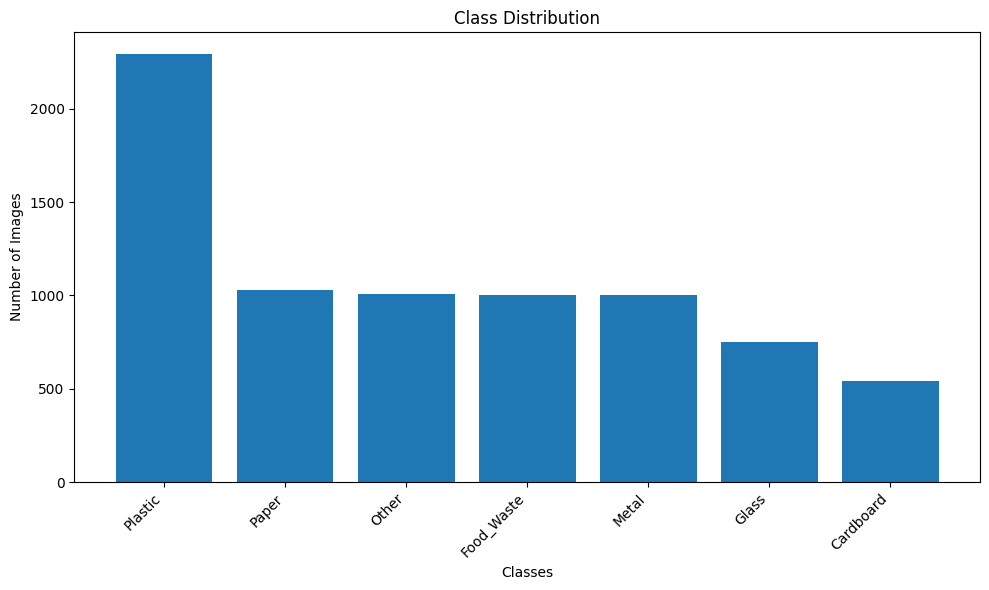

In [14]:
visualize_class_distribution(image_categories, image_count)

#### Plastic shows higher contribution, Paper, Food Waste, Metal are contributing at equal propotion and Cardboard with minimal contribution

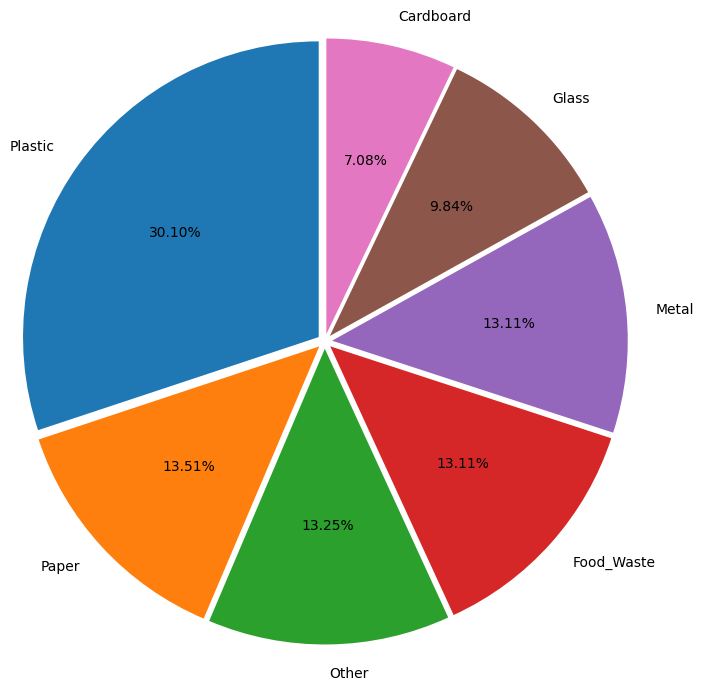

In [15]:
# Visualise Data Distribution


plt.pie(image_count, startangle=90, autopct='%0.2f%%', labels=image_categories, explode=[0.05,0.05,0.05,0.05,0.05,0.05,0.05], radius=2)
plt.show()



#### Pie chart clearly shows the distribution of each category of the waste with Plastic at higher level and Cardboard at minimal proportion of waste

#### **2.2.2** <font color=red> [3 marks] </font><br>
Visualise some sample images

In [16]:
def visualize_img(image_batch, label_batch):

  """

  Parameters:
  image_batch: Storing the matrix information of the images
  label_batch: A list that stores the class information of the image

  """

  plt.figure(figsize=(10,10))

  for n in range(10):

    ax= plt.subplot(5,5,n+1)
    plt.imshow(image_batch[n])

    plt.title(np.array(list(waste_labels.keys())) [to_categorical(labels_data, num_classes=7)[n]==1][0].title())

    plt.axis('off')

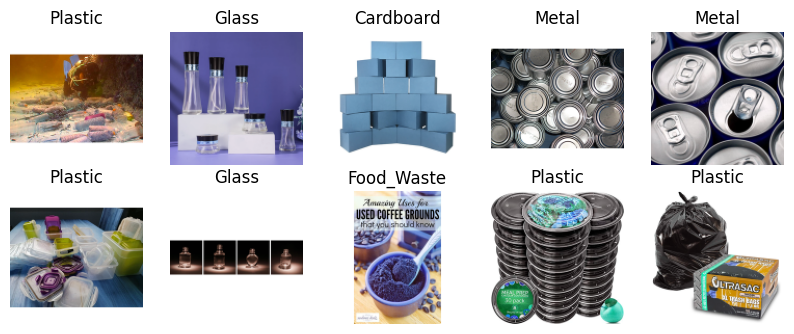

In [17]:
# Visualise Sample Images (across different labels)

visualize_img(images_data, labels_data)


#### **2.2.3** <font color=red> [3 marks] </font><br>
Based on the smallest and largest image dimensions, resize the images.

In [18]:
# Find the smallest and largest image dimensions from the data set

import os
from PIL import Image

# Set your dataset directory path here
data_dir = 'data'

min_width, min_height = float('inf'), float('inf')
max_width, max_height = 0, 0

# Loop through all classes and images
for root, dirs, files in os.walk(data_dir):
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp')):
            file_path = os.path.join(root, file)
            try:
                with Image.open(file_path) as img:
                    width, height = img.size
                    min_width = min(min_width, width)
                    min_height = min(min_height, height)
                    max_width = max(max_width, width)
                    max_height = max(max_height, height)
            except Exception as e:
                print(f"Error reading {file_path}: {e}")

print(f"📏 Smallest image dimensions: {min_width}x{min_height}")
print(f"📐 Largest image dimensions: {max_width}x{max_height}")


📏 Smallest image dimensions: 256x256
📐 Largest image dimensions: 256x256


In [19]:
# Resize the image dimensions

def resize_images(images_with_labels , target_size):
    """ Resizes all images to a target size. """

    resized_images_with_labels = []
    for image, label in images_with_labels:
        resized_image = PIL.Image.fromarray(image).resize(target_size)  # Resize using Pillow
        resized_images_with_labels.append((np.array(resized_image), label))
    
    return resized_images_with_labels

#### As Smallest & Largest images dimensions are same All the images are already having same size & no further resizing required

### **2.3 Encoding the classes** <font color=red> [3 marks] </font><br>

There are seven classes present in the data.

We have extracted the images and their labels, and visualised their distribution. Now, we need to perform encoding on the labels. Encode the labels suitably.

####**2.3.1** <font color=red> [3 marks] </font><br>
Encode the target class labels.

In [29]:
# Encode the labels suitably
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels_data)
encoded_labels_cat = to_categorical(encoded_labels)

### **2.4 Data Splitting** <font color=red> [5 marks] </font><br>

#### **2.4.1** <font color=red> [5 marks] </font><br>
Split the dataset into training and validation sets

In [88]:
# Assign specified parts of the dataset to train and validation sets

X_train, y_train, X_val, y_val= train_test_split(images_data, encoded_labels_cat, test_size=0.2, random_state=42, stratify=encoded_labels_cat)

# Convert the image data to numpy arrays
X_train = np.array([np.array(img) for img in X_train], dtype=np.float32) 
X_val = np.array(X_val, dtype=np.float32)

y_train = np.array([np.array(img) for img in y_train], dtype=np.float32) 
y_val = np.array(y_val, dtype=np.float32)

train_set = ImageDataGenerator(horizontal_flip=True,

                           vertical_flip=True,

                           validation_split=0.2,

                           rescale=1./255,

                           shear_range= 0.1,

                           zoom_range= 0.1,

                           rotation_range=15,

                           width_shift_range = 0.1,

                           height_shift_range = 0.1)

validation_set = ImageDataGenerator(rescale= 1./255,

                          validation_split= 0.2)


### Here we are using Stratify with encoded labels to handle the class imbalance

In [90]:
train_generator = tf.data.Dataset.from_tensor_slices((X_train, X_val))
train_generator = train_generator.shuffle(1000).batch(32).prefetch(tf.data.AUTOTUNE)

validation_generator = tf.data.Dataset.from_tensor_slices((y_train, y_val))
validation_generator = validation_generator.batch(32).prefetch(tf.data.AUTOTUNE)

## **3. Model Building and Evaluation** <font color=red> [20 marks] </font><br>

### **3.1 Model building and training** <font color=red> [15 marks] </font><br>

#### **3.1.1** <font color=red> [10 marks] </font><br>
Build and compile the model. Use 3 convolutional layers. Add suitable normalisation, dropout, and fully connected layers to the model.

Test out different configurations and report the results in conclusions.

In [92]:
# Build and compile the model

from tensorflow.keras.layers import BatchNormalization

def build_model():
    model = Sequential([
        
        Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
        MaxPooling2D(2,2),
        BatchNormalization(),
        

        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(2,2),
        BatchNormalization(),
        

        Conv2D(128, (3,3), activation='relu'),
        MaxPooling2D(2,2),
        BatchNormalization(),

        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(7, activation='softmax')
    ])
    return model

In [94]:
model = build_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               loss='categorical_crossentropy',
              metrics=['accuracy'])

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [96]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 63, 63, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 30, 30, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,943,303 (49.37 MB)

 Trainable params: 12,942,855 (49.37 MB)

 Non-trainable params: 448 (1.75 KB)

In [98]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('best_model.keras', save_best_only=True)  # Updated file format
]


#### **3.1.2** <font color=red> [5 marks] </font><br>
Train the model.

Use appropriate metrics and callbacks as needed.

In [100]:
# Training
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20,
    callbacks=callbacks
)


Epoch 1/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 58s 278ms/step - accuracy: 0.2819 - loss: 6.9730 - val_accuracy: 0.3390 - val_loss: 4.2109
Epoch 2/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 55s 290ms/step - accuracy: 0.3589 - loss: 2.3855 - val_accuracy: 0.3869 - val_loss: 1.9262
Epoch 3/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 53s 277ms/step - accuracy: 0.4521 - loss: 1.6118 - val_accuracy: 0.4577 - val_loss: 1.6415
Epoch 4/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 54s 283ms/step - accuracy: 0.5390 - loss: 1.2977 - val_accuracy: 0.4931 - val_loss: 1.7377
Epoch 5/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 51s 268ms/step - accuracy: 0.5689 - loss: 1.2080 - val_accuracy: 0.5364 - val_loss: 1.5027
Epoch 6/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 55s 287ms/step - accuracy: 0.6319 - loss: 1.0352 - val_accuracy: 0.4748 - val_loss: 2.7324
Epoch 7/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 53s 279ms/step - accuracy: 0.6575 - loss: 0.9326 - val_accuracy: 0.4013 - val_loss: 2.7964
Epoch 8/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 54s 282ms/step - accuracy: 0.6824 - loss: 0

#### Model trainning stopped after 14th epoch as there is no significant improvement in val loss in 5 consecutive steps

### **3.2 Model Testing and Evaluation** <font color=red> [5 marks] </font><br>

#### **3.2.1** <font color=red> [5 marks] </font><br>
Evaluate the model on test dataset. Derive appropriate metrics.

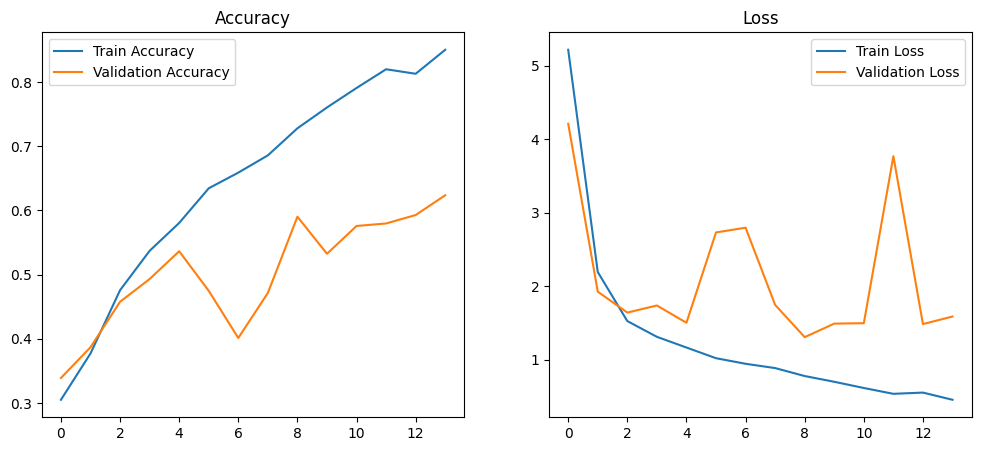

In [101]:
# Evaluate on the test set; display suitable metrics

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()

Text(0.5, 1.0, 'Training and Validation Loss')

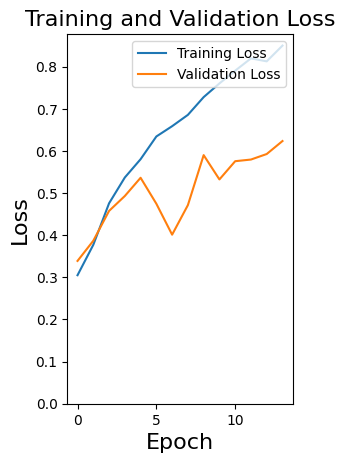

In [102]:
# Loss Graph



plt.subplot(1, 2, 2)

plt.plot(history.history['accuracy'], label='Training Loss')

plt.plot(history.history['val_accuracy'], label='Validation Loss')

plt.legend(loc='upper right')

plt.xlabel('Epoch', fontsize=16)

plt.ylabel('Loss', fontsize=16)

plt.ylim([0, max(plt.ylim())])

plt.title('Training and Validation Loss' , fontsize=16)

In [103]:
loss, acc = model.evaluate(validation_generator, batch_size=32)

48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.5971 - loss: 1.2707


In [104]:
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

print("\nTest loss: %.1f%%" % (100.0 * loss))


Test accuracy: 59.0%

Test loss: 130.7%


#### Classification Report

In [108]:
# Predict class probabilities
y_pred_probs = model.predict(validation_generator)

# Get class indices
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

# Generate classification report
print("Classification Report:\n")

print(classification_report(y_true_classes, y_pred_classes, target_names=waste_labels))

48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step
Classification Report:

              precision    recall  f1-score   support

  Food_Waste       0.47      0.73      0.57       200
       Metal       0.77      0.45      0.57       200
       Paper       0.82      0.37      0.51       206
     Plastic       0.59      0.77      0.67       459
       Other       0.54      0.45      0.49       202
   Cardboard       0.81      0.63      0.71       108
       Glass       0.50      0.52      0.51       150

    accuracy                           0.59      1525
   macro avg       0.64      0.56      0.57      1525
weighted avg       0.63      0.59      0.58      1525



#### Confustion Matrix

In [114]:
import itertools

cm = confusion_matrix(y_true_classes, y_pred_classes)



def plot_confusion_matrix(cm, classes,

                          normalize=False,

                          title='Confusion matrix',

                          cmap=plt.cm.Blues):



  """

  This function prints and plots the confusion matrix.

  Normalization can be applied by setting 'normalize=True'.

  """
  if normalize:

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]



  plt.figure(figsize=(8,6))

  plt.imshow(cm, interpolation='nearest', cmap=cmap)

  plt.title(title)

  plt.colorbar()

  tick_marks = np.arange(len(classes))

  plt.xticks(tick_marks, classes, rotation=45)

  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'

  thresh = cm.max() / 2.

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):

    plt.text(j, i, format(cm[i, j], fmt),

              horizontalalignment="center",

              color="white" if cm [i, j] > thresh else "black")

  plt.tight_layout()

  plt.ylabel('True label', fontweight="bold")

  plt.xlabel('Predicted label', fontweight="bold")

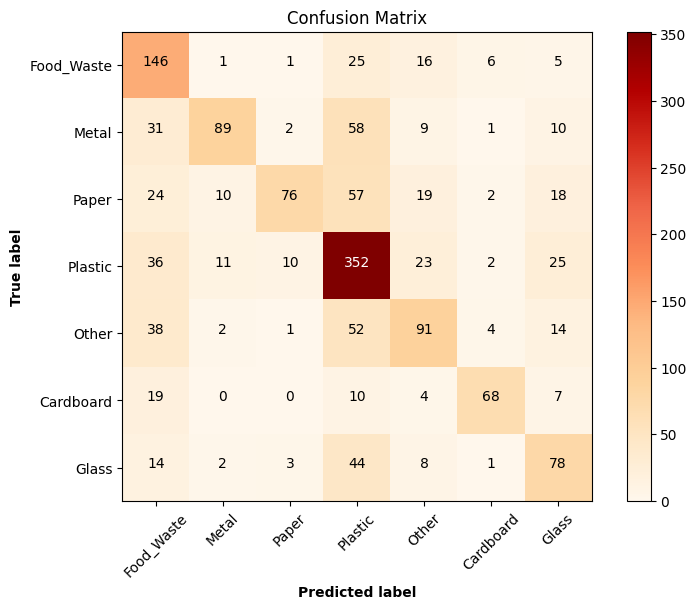

In [116]:
plot_confusion_matrix(cm, waste_labels.keys(),

                          title='Confusion Matrix',

                          cmap=plt.cm.OrRd)

#### confusion matrix shows waste category plastic prediction is higher than other categories , this could be due to more training images for plastic 

In [128]:
# Save the trained model

model.save("Waste_Classification_CNN_Model.h5")

## ++**4. Data Augmentation** <font color=red> [optional] </font><br>

#### **4.1 Create a Data Augmentation Pipeline**

##### **4.1.1**
Define augmentation steps for the datasets.

In [ ]:
# Define augmentation steps to augment images



Augment and resample the images.
In case of class imbalance, you can also perform adequate undersampling on the majority class and augment those images to ensure consistency in the input datasets for both classes.

Augment the images.

In [12]:
# Create a function to augment the images
import Augmentor

# List of class folders

classes = ['Cardboard', 'Food_Waste', 'Glass', 'Metal', 'Paper','Plastic','Other'  ]
base_path = 'data/'

for cls in classes:
    p = Augmentor.Pipeline(source_directory=os.path.join(base_path, cls), output_directory="output")
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.flip_left_right(probability=0.5)
    p.zoom_random(probability=0.5, percentage_area=0.8)
    p.random_contrast(probability=0.3, min_factor=0.7, max_factor=1.3)
    p.sample(1000)  # Number of augmented images you want to generate




Initialised with 540 image(s) found.
Output directory set to data/Cardboard\output.

Processing <PIL.PngImagePlugin.PngImageFile image mode=RGB size=256x256 at 0x161E0BCE150>: 100%|██████████| 1000/1000 [00:02<00:00, 339.70 Samples/s]


Initialised with 1000 image(s) found.
Output directory set to data/Food_Waste\output.

Processing <PIL.Image.Image image mode=RGB size=256x256 at 0x161E0AA49B0>: 100%|██████████| 1000/1000 [00:03<00:00, 320.38 Samples/s]               


Initialised with 750 image(s) found.
Output directory set to data/Glass\output.

Processing <PIL.Image.Image image mode=RGB size=256x256 at 0x161E00A4A70>: 100%|██████████| 1000/1000 [00:03<00:00, 323.91 Samples/s]               


Initialised with 1000 image(s) found.
Output directory set to data/Metal\output.

Processing <PIL.Image.Image image mode=RGB size=256x256 at 0x161D4062EA0>: 100%|██████████| 1000/1000 [00:03<00:00, 285.31 Samples/s]               


Initialised with 1030 image(s) found.
Output directory set to data/Paper\output.

Processing <PIL.Image.Image image mode=RGB size=256x256 at 0x161E0894410>: 100%|██████████| 1000/1000 [00:03<00:00, 290.64 Samples/s]               


Initialised with 2295 image(s) found.
Output directory set to data/Plastic\output.

Processing <PIL.Image.Image image mode=RGB size=256x256 at 0x161E0A0CDA0>: 100%|██████████| 1000/1000 [00:03<00:00, 292.35 Samples/s]               


Initialised with 1010 image(s) found.
Output directory set to data/Other\output.

Processing <PIL.Image.Image image mode=RGB size=256x256 at 0x161E0ACBCE0>: 100%|██████████| 1000/1000 [00:03<00:00, 282.57 Samples/s]               


In [20]:
import shutil

source_root = "data"
target_root = "augmented_dataset"

for cls in classes:
    source_folder = os.path.join(source_root, cls, "output")
    target_folder = os.path.join(target_root, cls)

    os.makedirs(target_folder, exist_ok=True)

    if os.path.exists(source_folder):
        for filename in os.listdir(source_folder):
            if filename.endswith(".png"):
                shutil.move(
                    os.path.join(source_folder, filename),
                    os.path.join(target_folder, filename)
                )

In [22]:
# Create the augmented training dataset

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    'augmented_dataset/',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    'augmented_dataset/',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 5600 images belonging to 7 classes.
Found 1400 images belonging to 7 classes.


##### **4.1.2**

Train the model on the new augmented dataset.

In [50]:
# Train the model using augmented images
from tensorflow.keras.layers import BatchNormalization
#building a CNN model

def build_model():
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
        MaxPooling2D(2,2),
        BatchNormalization(),

        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(2,2),
        BatchNormalization(),

        Conv2D(128, (3,3), activation='relu'),
        MaxPooling2D(2,2),
        BatchNormalization(),

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(len(train_generator.class_indices), activation='softmax')
    ])
    return model

In [52]:
# Compile the CNN model

model = build_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [54]:
# Display Model Summary

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 63, 63, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 30, 30, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,306,439 (12.61 MB)

 Trainable params: 3,305,991 (12.61 MB)

 Non-trainable params: 448 (1.75 KB)

In [56]:
# Implement early stopping and checkpointing

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('best_model.keras', save_best_only=True)  # Updated file format
]

In [58]:
# Train the CNN model

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,
    callbacks=callbacks
)

Epoch 1/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 85s 471ms/step - accuracy: 0.2723 - loss: 2.6018 - val_accuracy: 0.1779 - val_loss: 1.9398
Epoch 2/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 40s 226ms/step - accuracy: 0.4840 - loss: 1.5147 - val_accuracy: 0.2593 - val_loss: 1.9513
Epoch 3/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 40s 231ms/step - accuracy: 0.5960 - loss: 1.1476 - val_accuracy: 0.3707 - val_loss: 1.7551
Epoch 4/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 40s 229ms/step - accuracy: 0.7033 - loss: 0.8520 - val_accuracy: 0.4250 - val_loss: 1.7475
Epoch 5/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 39s 225ms/step - accuracy: 0.7793 - loss: 0.6287 - val_accuracy: 0.4043 - val_loss: 1.8514
Epoch 6/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 40s 231ms/step - accuracy: 0.8308 - loss: 0.4942 - val_accuracy: 0.4243 - val_loss: 1.8714
Epoch 7/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 39s 223ms/step - accuracy: 0.8722 - loss: 0.3960 - val_accuracy: 0.4007 - val_loss: 1.9802
Epoch 8/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 40s 230ms/step - accuracy: 0.8909 - loss: 0

In [59]:
# Save the trained model

model.save("Waste_Classification_CNN_Model_After_Aggregation.h5")

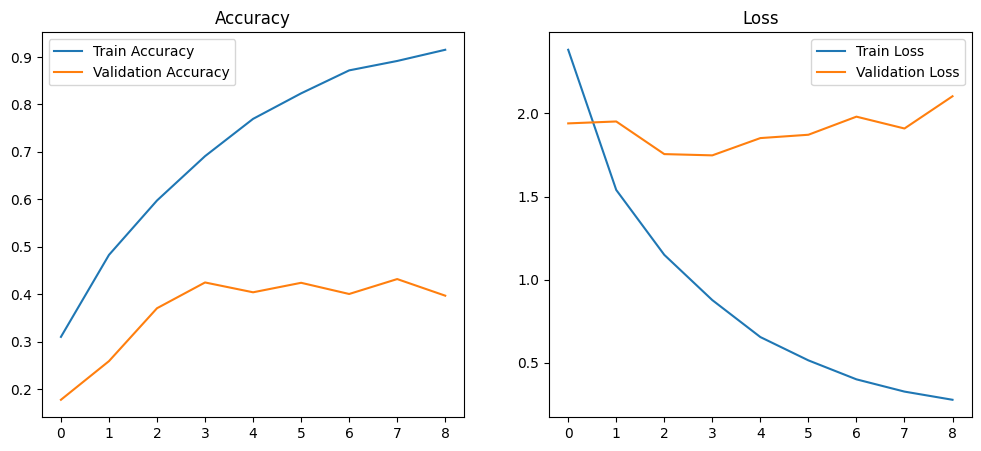

In [60]:
# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()

## **5. Conclusions** <font color = red> [5 marks]</font>

#### **5.1 Conclude with outcomes and insights gained** <font color =red> [5 marks] </font>

* Report your findings about the data
* Report model training results

#### Observations or finding from the data
1. Input dataset has 7 classes of images
2. Plastic contributing higher percentage (30%), Paper, Metal, Food Waste & Other constitues around 13% each, Glass with 10% waste and cardboard with lower percentage of waste (7%)
3. This distribution clearly says class imbalance and need to hanlde it

#### Stratify & Label Encoders are used to solve class imbalance

#### CNN Model for Waste seggregation built with accuracy of 85.13 %

#### Augmentation improved the accuracy of CNN Waste Segregation model to 92.15 %


#### Confusion Matrix shows waste category plastic prediction is higher than other categories , this could be due to more training images for plastic 